## Лабораторная работа №1 по курсу "Машинное обучение и анализ данных"

---

### Выполнил: Дурандин Владимир Евгеньевич 3821Б1ФИ3

----

**Датасет:** [Kaggle](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction/data)

**Задача:** \
В датасете собрана информация о клиентах, которые владеют кредитными картами. На основе этой информации необходимо попытаться предсказать, прекратит ли клиент использование кредитной карты (задача классификации).

1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (ререссию) ближайших соседей или другой метод (аргументируйте выбор!)
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### 1. Чтение данных

In [146]:
# url = "https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?select=BankChurners.csv"
url = "/kaggle/input/credit-card-customers-prediction/BankChurners.csv"

data = pd.read_csv(url)
data.shape

(10127, 23)

# 1. Визуализация данных

In [147]:
data.head() # Первые 5 записей

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


1. `CLIENTNUM`: Уникальный идентификатор клиента, владеющего счетом.
2. `Attrition_Flag`: Переменная, показывающая, закрыт ли счет (1 — закрыт, 0 — активен).
3. `Customer_Age`: Возраст клиента в годах.
4. `Gender`: Пол клиента (M — Мужчина, F — Женщина).
5. `Dependent_count`: Количество иждивенцев у клиента.
6. `Education_Level`: Уровень образования владельца счета (например, среднее, высшее).
7. `Marital_Status`: Семейное положение (женат, холост, разведен, неизвестно).
8. `Income_Category`: Категория годового дохода клиента (< \\$40K, \\$40K - \\$60K, \\$60K - \\$80K, \\$80K - \\$120K, > \\$120K).
9. `Card_Category`: Тип карты (Blue, Silver, Gold, Platinum).
10. `Months_on_book`: Период отношений с банком.
11. `Total_Relationship_count`: Общее количество продуктов, которыми владеет клиент.
12. `Months_Inactive_12_mon`: Количество месяцев неактивности за последние 12 месяцев.
13. `Contacts_Count_12_mon`: Количество контактов за последние 12 месяцев.
14. `Credit_Limit`: Кредитный лимит на кредитной карте.
15. `Total_Revolving_Bal`: Общий остаток по кредитной карте.
16. `Avg_Open_To_Buy`: Средний доступный кредитный лимит (за последние 12 месяцев).
17. `Total_Amt_Chng_Q4_Q1`: Изменение суммы транзакций (в Q4 по сравнению с Q1).
18. `Total_Trans_Amt`: Общая сумма транзакций (за последние 12 месяцев).
19. `Total_Trans_Ct`: Общее количество транзакций (за последние 12 месяцев).
20. `Total_Ct_Chng_Q4_Q1`: Изменение количества транзакций (в Q4 по сравнению с Q1).
21. `Avg_Utilization_Ratio`: Средний коэффициент использования кредита. (Отношение испульзуемых кредитных денег к кредитному лимиту)
22. `Naive_Bayes_Classifier_attribution`: Принадлежность к классу по классификатору Наивного Байеса.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [149]:
print(data.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [150]:
print(data.shape)
print(data.index)

(10127, 23)
RangeIndex(start=0, stop=10127, step=1)


In [151]:
data.at[2, "Customer_Age"] # Значение возраста клиента из третьего ряда датафрейма

51

In [152]:
data["Customer_Age"]

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Customer_Age, Length: 10127, dtype: int64

In [153]:
data["Customer_Age"][2]

51

In [154]:
data.describe(include="all").T # Сводная статистика для числовых столбцов в датафрейме

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,NaN,NaN,NaN,739177606.333663,36903783.450231,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.0,NaN,NaN,NaN,46.32596,8.016814,26.0,41.0,46.0,52.0,73.0
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.0,NaN,NaN,NaN,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Education_Level,10127,7,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,10127,4,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.0,NaN,NaN,NaN,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0


In [155]:
from tabulate import tabulate

def print_col_info(df):
    uniq_col_count = []
    for col in df:
        uniq_count = df[col].unique()
        types = set([type(x) for x in uniq_count])
        uniq_col_count.append([col, len(uniq_count), uniq_count[:10], types])

    uniq_col_count.sort(key=lambda x: x[1])

    print(tabulate(uniq_col_count, headers=['Col', 'Uniq_num', 'Values (top 10)', 'Types']))

print_col_info(data)

Col                                                                                                                                   Uniq_num  Values (top 10)                                                             Types
----------------------------------------------------------------------------------------------------------------------------------  ----------  --------------------------------------------------------------------------  -------------------------
Attrition_Flag                                                                                                                               2  ['Existing Customer' 'Attrited Customer']                                   {<class 'str'>}
Gender                                                                                                                                       2  ['M' 'F']                                                                   {<class 'str'>}
Marital_Status                                          

## Удаление столбцов ID клиента и классификаторы Байеса, так как они не нужны для дальнейшего анализа 

In [156]:
data.drop(columns=["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

### Убедимся в том, что нет отсутствующих значений

In [157]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


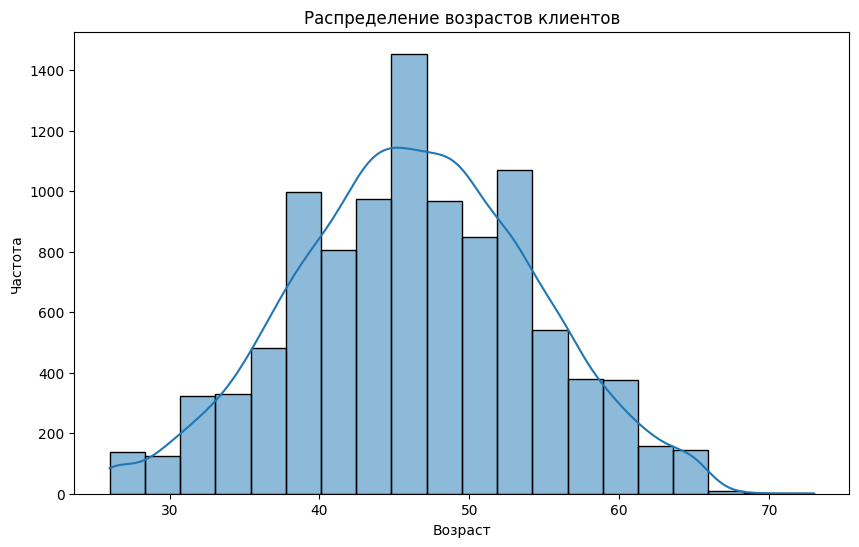

In [158]:
data['Customer_Age'] = data['Customer_Age'].replace([np.inf, -np.inf], np.nan) # Проверка данных на наличие бесконечных значений и замена на NaN

plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], bins=20, kde=True)
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


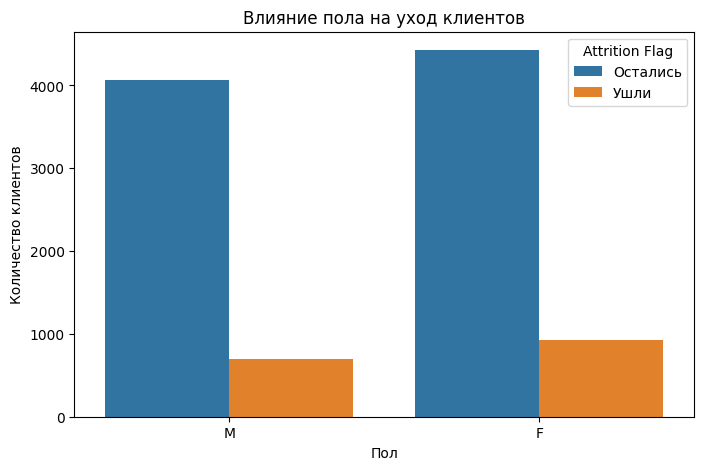

In [159]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Gender', hue='Attrition_Flag')
plt.title('Влияние пола на уход клиентов')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(title='Attrition Flag', labels=['Остались', 'Ушли'])
plt.show()


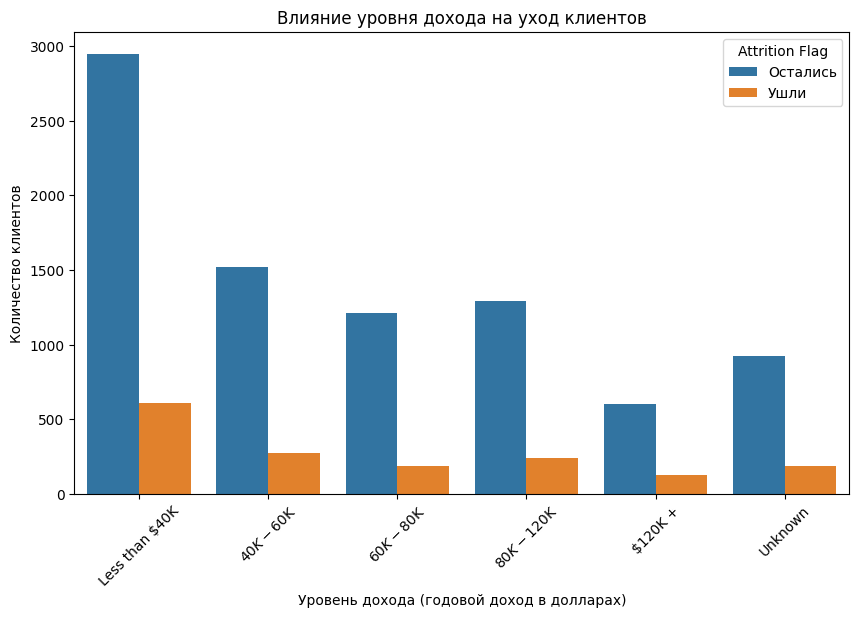

In [160]:
# Порядок категорий дохода
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Income_Category', hue='Attrition_Flag', order=income_order)
plt.title('Влияние уровня дохода на уход клиентов')
plt.xlabel('Уровень дохода (годовой доход в долларах)')
plt.ylabel('Количество клиентов')
plt.legend(title='Attrition Flag', labels=['Остались', 'Ушли'])
plt.xticks(rotation=45)
plt.show()


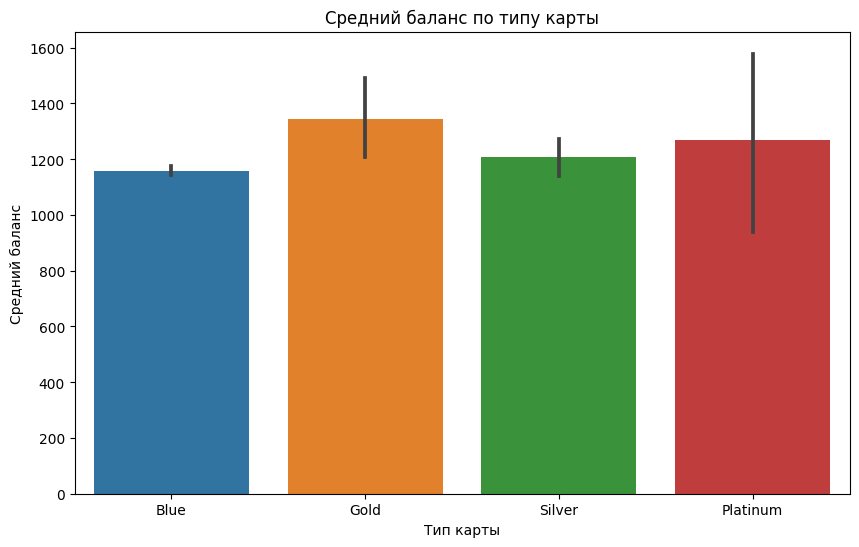

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Card_Category', y='Total_Revolving_Bal', estimator=np.mean)
plt.title('Средний баланс по типу карты')
plt.xlabel('Тип карты')
plt.ylabel('Средний баланс')
plt.show()

<Figure size 1200x1200 with 0 Axes>

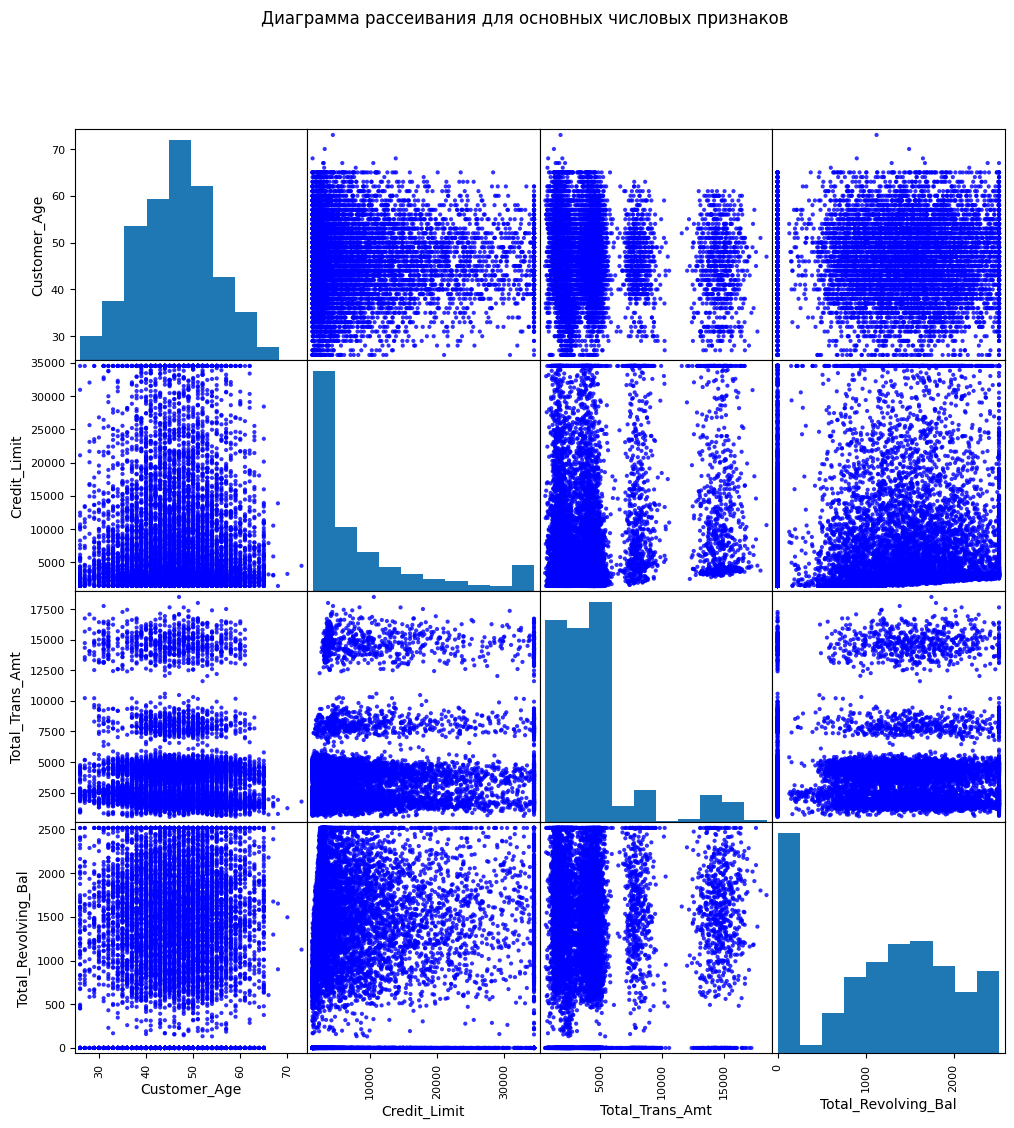

In [162]:
from pandas.plotting import scatter_matrix

selected_features = ["Customer_Age", "Credit_Limit", "Total_Trans_Amt", "Total_Revolving_Bal"]

plt.figure(figsize=(12, 12))
scatter_matrix(data[selected_features], alpha=0.8, figsize=(12, 12), diagonal='hist', color='blue')
plt.suptitle("Диаграмма рассеивания для основных числовых признаков")
plt.show()


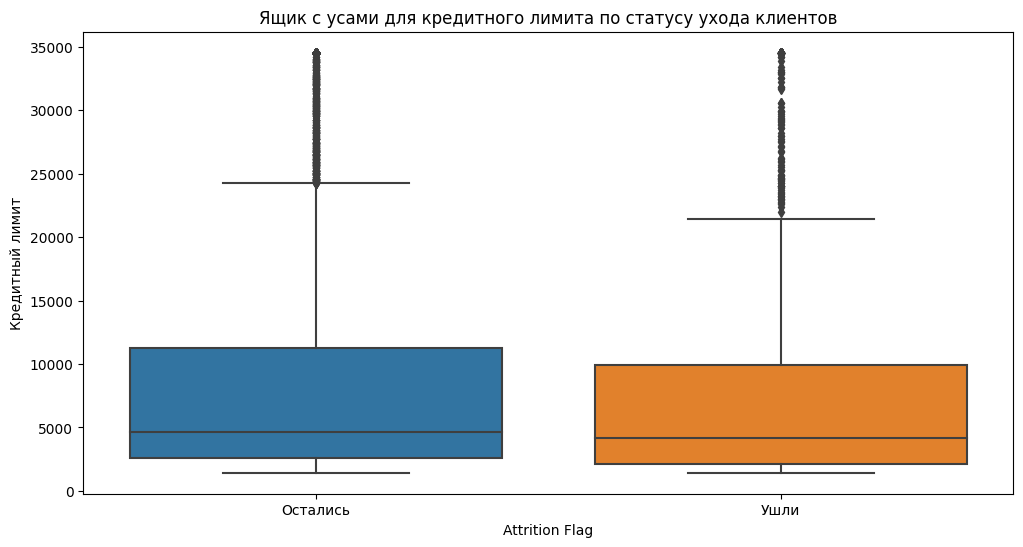

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [163]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Attrition_Flag', y='Credit_Limit')
plt.title('Ящик с усами для кредитного лимита по статусу ухода клиентов')
plt.xlabel('Attrition Flag')
plt.ylabel('Кредитный лимит')
plt.xticks(ticks=[0, 1], labels=['Остались', 'Ушли'])
plt.show()
data['Credit_Limit'].describe()

### Построение корреляционный матрицы.
Сначала только для числовых признаков, а потом для всех признаков, используя `One-Hot Encoding` с параметром `drop_first=False` для наглядности графика, а в дальнейшем установим его в `drop_first=True` для избежания мультиколлинеарности

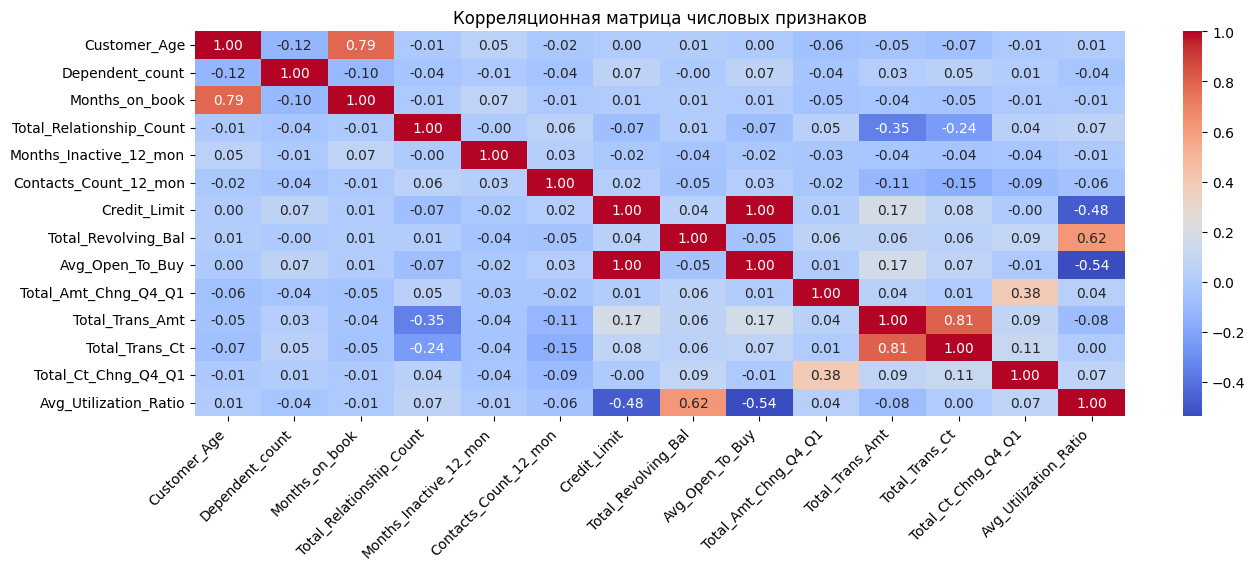

In [164]:
# Только числовые столбцы
numerical_data = data.select_dtypes(include=[np.number])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.xticks(rotation=45, ha="right")
plt.title("Корреляционная матрица числовых признаков")
plt.show()


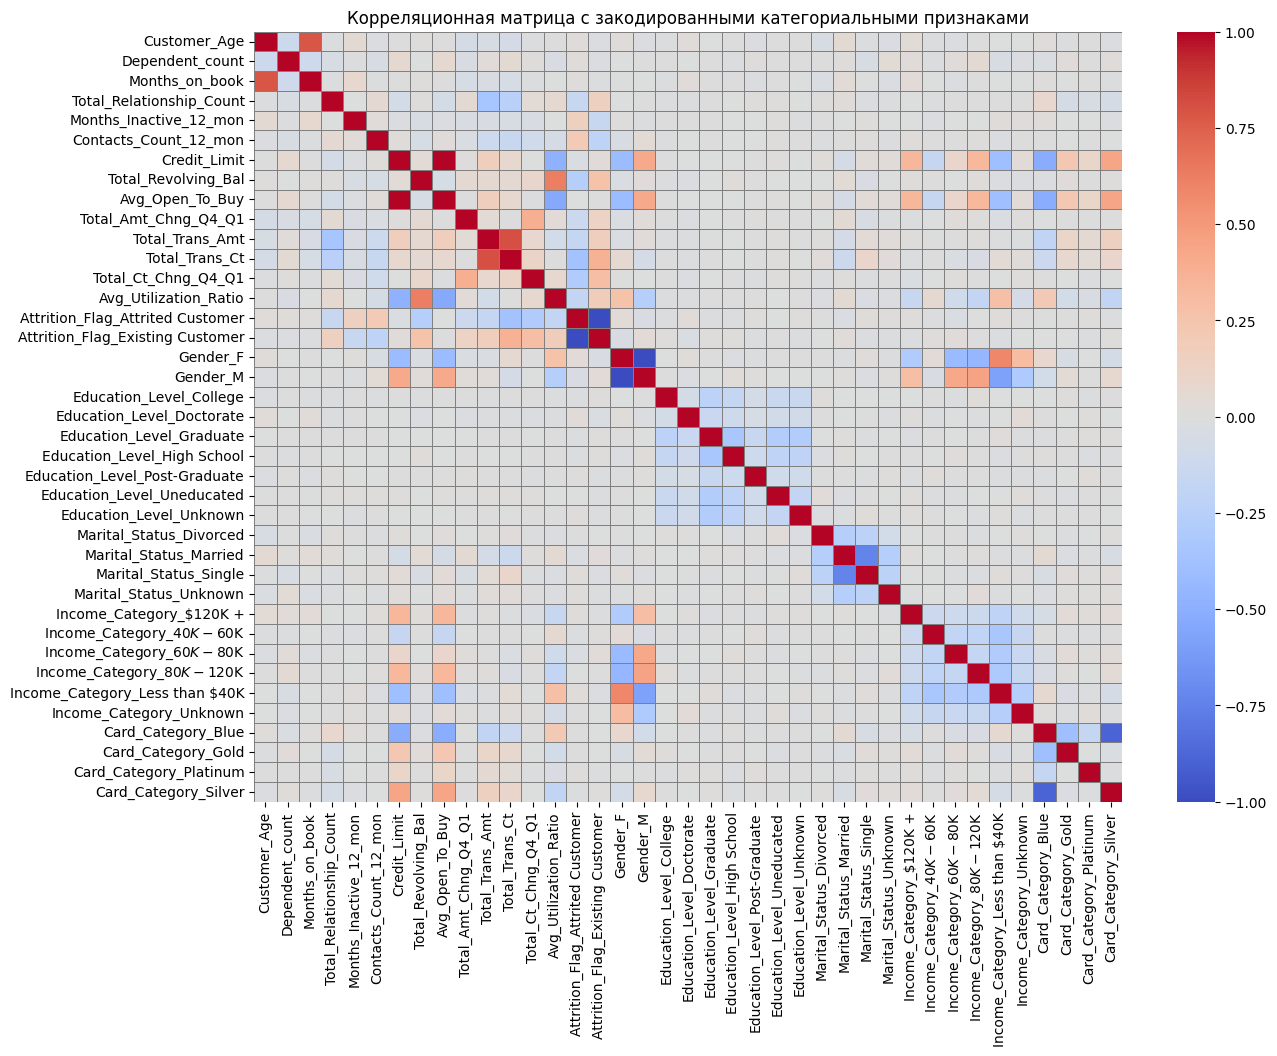

In [165]:
# Кодировка категориальных признаков с помощью One-Hot Encoding
data_encoded = pd.get_dummies(data, drop_first=False)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5, linecolor='gray')
# plt.xticks(rotation=75, ha="right")
plt.title("Корреляционная матрица с закодированными категориальными признаками")
plt.show()


## Обработка категориальных признаков

In [166]:
# Бинарное кодирование признаков с двумя уникальными значениями
data_encoded = data.copy()
data_encoded['Attrition_Flag'] = data_encoded['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})
data_encoded['Gender'] = data_encoded['Gender'].map({'M': 0, 'F': 1})

# Применение One-Hot Encoding для признаков с более чем двумя уникальными значениями
one_hot_features = ["Marital_Status", "Card_Category", "Income_Category", "Education_Level"]
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_features, drop_first=True)

# Преобразование всех булевых столбцов в целые числа
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

data_encoded.tail().T


,10122,10123,10124,10125,10126
Attrition_Flag,0.000,1.000,1.000,1.000,1.000
Customer_Age,50.000,41.000,44.000,30.000,43.000
Gender,0.000,0.000,1.000,0.000,1.000
Dependent_count,2.000,2.000,1.000,2.000,2.000
Months_on_book,40.000,25.000,36.000,36.000,25.000
Total_Relationship_Count,3.000,4.000,5.000,4.000,6.000
Months_Inactive_12_mon,2.000,2.000,3.000,3.000,2.000
Contacts_Count_12_mon,3.000,3.000,4.000,3.000,4.000
Credit_Limit,4003.000,4277.000,5409.000,5281.000,10388.000
Total_Revolving_Bal,1851.000,2186.000,0.000,0.000,1961.000


In [167]:
from tabulate import tabulate

def print_col_info(df):
    uniq_col_count = []
    for col in df:
        uniq_count = df[col].unique()
        types = set([type(x) for x in uniq_count])
        uniq_col_count.append([col, len(uniq_count), uniq_count[:10], types])

    uniq_col_count.sort(key=lambda x: x[1])

    print(tabulate(uniq_col_count, headers=['Col', 'Uniq_num', 'Values (top 10)', 'Types']))

print_col_info(data_encoded)

Col                               Uniq_num  Values (top 10)                                                          Types
------------------------------  ----------  -----------------------------------------------------------------------  -------------------------
Attrition_Flag                           2  [0 1]                                                                    {<class 'numpy.int64'>}
Gender                                   2  [0 1]                                                                    {<class 'numpy.int64'>}
Marital_Status_Married                   2  [1 0]                                                                    {<class 'numpy.int64'>}
Marital_Status_Single                    2  [0 1]                                                                    {<class 'numpy.int64'>}
Marital_Status_Unknown                   2  [0 1]                                                                    {<class 'numpy.int64'>}
Card_Category_Gold           

## Нормализация данных

In [168]:
from sklearn.preprocessing import StandardScaler

normalized_data = data_encoded.copy()

# Отделение целевого признака
y = normalized_data["Attrition_Flag"]

# Удаление целевого признака из набора данных
X = normalized_data.drop("Attrition_Flag", axis=1)

scaler = StandardScaler()

# Применение StandardScaler ко всем числовым признакам
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Объединение нормализованных признаков с целевым признаком
normalized_data = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

normalized_data.head().T


,0,1,2,3,4
Customer_Age,-0.165406,0.333570,0.583058,-0.789126,-0.789126
Gender,-1.059956,0.943436,-1.059956,0.943436,-1.059956
Dependent_count,0.503368,2.043199,0.503368,1.273283,0.503368
Months_on_book,0.384621,1.010715,0.008965,-0.241473,-1.869317
Total_Relationship_Count,0.763943,1.407306,0.120579,-0.522785,0.763943
Months_Inactive_12_mon,-1.327136,-1.327136,-1.327136,1.641478,-1.327136
Contacts_Count_12_mon,0.492404,-0.411616,-2.219655,-1.315636,-2.219655
Credit_Limit,0.446622,-0.041367,-0.573698,-0.585251,-0.430877
Total_Revolving_Bal,-0.473422,-0.366667,-1.426858,1.661686,-1.426858
Avg_Open_To_Buy,0.488971,-0.008486,-0.445658,-0.734100,-0.302868


## Разбиение данных на обучающую и тестовую выборки

In [169]:
from sklearn.model_selection import train_test_split

# Выделение целевого признака и признаков данных
X = normalized_data.drop("Attrition_Flag", axis=1)  # признаки (все, кроме целевого)
y = normalized_data["Attrition_Flag"]               # целевой признак

# Разделение данных на обучающую и тестовую выборки (80% на обучение, 20% на тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y пропорциональное распределение классов целевого признака в обучающей и тестовой выборках

print(f"Размер обучающей выборки: {X_train.shape[0]} примеров")
print(f"Размер тестовой выборки: {X_test.shape[0]} примеров")


Размер обучающей выборки: 8101 примеров
Размер тестовой выборки: 2026 примеров


## Запуск классификатора ближайших соседей

In [170]:
y_train

2856    0
6515    1
7141    0
632     0
3496    0
       ..
6147    0
8858    0
3284    1
7551    0
7469    0
Name: Attrition_Flag, Length: 8101, dtype: int64

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [172]:
parameters = {'n_neighbors': list(range(3, 11))}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, parameters, verbose=2, cv=4)
clf.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=4; total time=   0.2s
[CV] END ......................................n_neighbors=4; total time=   0.2s
[CV] END ......................................n_neighbors=4; total time=   0.2s
[CV] END ......................................n_neighbors=4; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}, verbose=2)

In [173]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

print("\nОтчет классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred))

print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_pred))

print(f"Лучшие параметры: {clf.best_params_}")

Точность на обучающей выборке: 0.8991
Точность на тестовой выборке: 0.8741

Отчет классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1701
           1       0.80      0.29      0.42       325

    accuracy                           0.87      2026
   macro avg       0.84      0.64      0.68      2026
weighted avg       0.87      0.87      0.85      2026

Матрица ошибок:
[[1677   24]
 [ 231   94]]
Лучшие параметры: {'n_neighbors': 7}


Судя по результатам, оптимальным значением `k` оказался параметр `7`, который нашел `GridSearchCV`. Но, даже с подобранным `k`, метрики для класса `1` (клиентов, которые прекратили использование карты) остаются невысокими.

`Recall` для класса `1` — `0.29`, что говорит о том, что модель обнаруживает только `29%` клиентов, прекративших использование карты.
`F1-score` для класса `1` — `0.42`, что тоже невысоко и указывает на трудности модели с распознаванием клиентов, которые прекращают использование карты.
В матрице ошибок видно, что `231` клиента из класса `1` были неверно классифицированы как класс `0`, что в условиях реального применения могло бы привести к неверным управленческим решениям. Одной из причин не столь высокой оценки является несбалансированный датасет.

Необхоидмо попробовать балансировку данных, а также рассмотреть альтернативные модели.

In [174]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Размер сбалансированной обучающей выборки: {X_train_balanced.shape[0]}")
print(f"Количество примеров каждого класса после SMOTE: {y_train_balanced.value_counts()}")

# Обучаем KNN на сбалансированных данных с оптимальным значением k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_balanced, y_train_balanced)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

print("\nОтчет классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred))

print("Матрица ошибок на тестовой выборке:")
print(confusion_matrix(y_test, y_test_pred))


Размер сбалансированной обучающей выборки: 13598
Количество примеров каждого класса после SMOTE: Attrition_Flag
0    6799
1    6799
Name: count, dtype: int64
Точность на обучающей выборке: 0.8521
Точность на тестовой выборке: 0.7808

Отчет классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1701
           1       0.40      0.77      0.53       325

    accuracy                           0.78      2026
   macro avg       0.67      0.77      0.69      2026
weighted avg       0.86      0.78      0.80      2026

Матрица ошибок на тестовой выборке:
[[1333  368]
 [  76  249]]


Точность на обучающей выборке снизилась до `85.2%`, а на тестовой — до `78.1%`. Это нормально для моделей на сбалансированных данных, так как теперь модель уделяет больше внимания меньшему классу.

`Recall` для класса `1` увеличился до `0.77` — теперь модель распознает `77%` клиентов, которые прекратили использование карты, что значительно лучше по сравнению с предыдущей попыткой.

`Precision` для класса `1` снизился до `0.40`, что говорит о большем количестве ложноположительных срабатываний (клиентов, которых модель ошибочно определила как класс `1`).

`F1-score` для класса `1` увеличился до `0.53`, что является улучшением и указывает на более сбалансированное представление классов.

In [175]:
from sklearn.linear_model import LogisticRegression

# Логистическая регрессия с балансировкой классов
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

y_train_pred_lr = log_reg.predict(X_train)
y_test_pred_lr = log_reg.predict(X_test)

train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("Логистическая регрессия:")
print(f"Точность на обучающей выборке: {train_accuracy_lr:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy_lr:.4f}")

print("\nОтчет классификации на тестовой выборке:")
print(classification_report(y_test, y_test_pred_lr))

print("Матрица ошибок:")
print(confusion_matrix(y_test, y_test_pred_lr))


Логистическая регрессия:
Точность на обучающей выборке: 0.8510
Точность на тестовой выборке: 0.8559

Отчет классификации на тестовой выборке:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.82      0.65       325

    accuracy                           0.86      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.86      0.87      2026

Матрица ошибок:
[[1468  233]
 [  59  266]]


Модель на основе логистической регрессии с балансировкой весов классов продемонстрировала лучший баланс между точностью и полнотой, особенно для класса `1`. Это улучшение означает, что логистическая регрессия смогла извлечь полезные признаки и более эффективно справилась с дисбалансом классов, чем `KNN` и `KNN + SMOTE`. Если цель — максимизировать полноту класса `1` при поддержании высокой общей точности, логистическая регрессия выглядит оптимальным выбором.

## Общие выводы

В рамках подготовки данных были обработаны пропущенные значения и категориальные признаки: двоичные признаки (например, пол) кодировались с помощью `Label Encoding`, а признаки с большим количеством категорий — `One-Hot Encoding`.
Мы также нормализовали числовые признаки, чтобы улучшить работу классификаторов, таких как KNN.
Дисбаланс классов был значительным (класс 0 имел в 5 раз больше примеров, чем класс 1), поэтому при оценке результатов в конечнос счёте учитывалась необходимость эффективно распознавать меньший класс.

Мы протестировали три различных подхода к решению задачи:

`K-Nearest Neighbors` (KNN) без балансировки классов:
* Обучение на несбалансированных данных с параметром `k=7`.
* Основные проблемы `KNN` заключались в низкой полноте для класса `1` (меньший класс), несмотря на высокую общую точность.
* Модель оказалась склонной к ошибочному определению клиентов как класс 0, не способствуя решению поставленной задачи, где важно верно определить меньший класс.

`K-Nearest Neighbors` (KNN) с балансировкой через `SMOTE`:
* После использования техники `SMOTE` для балансировки классов модель стала лучше идентифицировать класс `1` и увеличила полноту для этого класса.
* Но в противовес возникли значительные ложноположительные классификации, что отразилось на снижении общей точности модели на тестовой выборке. Это указывает на то, что `KNN` чувствителен к дисбалансу и требует дополнительных мер для повышения стабильности.

`Логистическая регрессия` с балансировкой классов:
* Логистическая регрессия показала наилучшие результаты, особенно для распознавания клиентов, прекращающих использование кредитной карты.
* Полнота для класса `1` выросла до `82%`, а точность модели на тестовой выборке составила `85.6%`.
* В итоге этот метод продемонстрировал хороший баланс между полнотой и точностью.


Для задачи прогнозирования оттока клиентов с кредитных карт лучшим выбором оказалась логистическая регрессия с учетом дисбаланса классов, которая показала высокий уровень предсказуемости и баланс между метриками для классов. Это обеспечивает высокую надежность в идентификации потенциальных клиентов для удержания, что может стать ключевым преимуществом для бизнеса.